In [ ]:
# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
from statsmodels.tsa.arima_model import ARIMA

In [6]:
!pip install statsmodels --upgrade
#The ExponentialSmoothing model has been moved to the statsmodels.tsa.holtwinters module.
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
from sklearn.metrics import mean_squared_error

In [ ]:
 # Part 1: Data Preparation and Exploration

In [12]:
data = pd.read_csv('/content/exchange_rate.csv')

In [15]:
print(data.head(10))

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849
5  06-01-1990 00:00   0.7866
6  07-01-1990 00:00   0.7886
7  08-01-1990 00:00   0.7910
8  09-01-1990 00:00   0.7939
9  10-01-1990 00:00   0.7894


In [18]:
data. describe

<bound method NDFrame.describe of                   date   Ex_rate
0     01-01-1990 00:00  0.785500
1     02-01-1990 00:00  0.781800
2     03-01-1990 00:00  0.786700
3     04-01-1990 00:00  0.786000
4     05-01-1990 00:00  0.784900
...                ...       ...
7583  06-10-2010 00:00  0.718494
7584  07-10-2010 00:00  0.721839
7585  08-10-2010 00:00  0.723197
7586  09-10-2010 00:00  0.720825
7587  10-10-2010 00:00  0.720825

[7588 rows x 2 columns]>

In [ ]:
# Plot the time series for USD to AUD

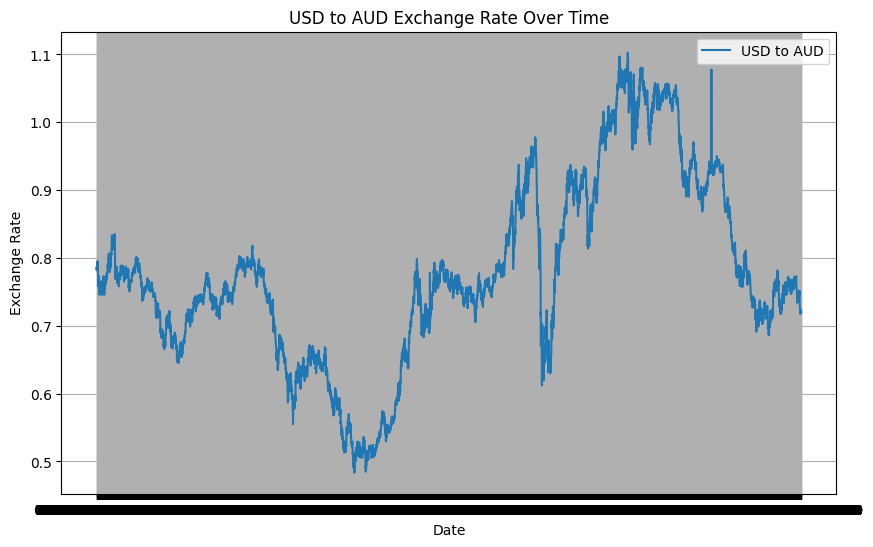

In [20]:
# Assuming the CSV file has a column named 'Ex_rate' representing USD to AUD exchange rate
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['Ex_rate'], label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
print(data.isnull().sum())  #  missing values

date       0
Ex_rate    0
dtype: int64


In [22]:
data_interpolated = data.interpolate(method='linear')  ### Interpolate missing values (linear interpolation method)

<ipython-input-22-26bba2f36605>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_interpolated = data.interpolate(method='linear')


In [23]:
# Check again for missing values after interpolation
print(data_interpolated.isnull().sum())

date       0
Ex_rate    0
dtype: int64


In [ ]:
#Part 2: Model Building - ARIMA

In [24]:
# Plot ACF and PACF for the USD to AUD time series
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Index(['date', 'Ex_rate'], dtype='object')


Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

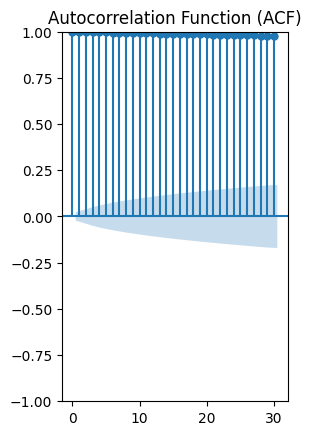

In [28]:
plt.subplot(121)
# Verify the correct column name from the DataFrame
print(data_interpolated.columns)
# Assuming the correct column name is 'Ex_rate'
plot_acf(data_interpolated['Ex_rate'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

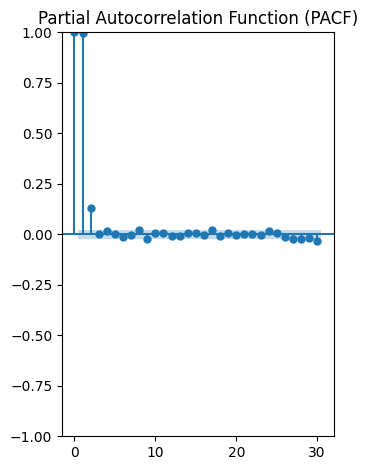

In [31]:
plt.subplot(122)
# Use the correct column name 'Ex_rate'
plot_pacf(data_interpolated['Ex_rate'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [37]:
# Define ARIMA model (replace p, d, q with appropriate values from ACF and PACF analysis)
model_arima = ARIMA(data_interpolated['Ex_rate'], order=(p, d, q)) # Use the correct column name 'Ex_rate'

In [38]:
# Define ARIMA model
# Replace p, d, q with appropriate values from ACF and PACF analysis
# Example values are shown below - you should replace these with your own
p = 5
d = 1
q = 0
model_arima = ARIMA(data_interpolated['Ex_rate'], order=(p, d, q)) # Use the correct column name 'Ex_rate'

In [35]:
# Import the correct ARIMA class
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model
# Replace p, d, q with appropriate values from ACF and PACF analysis
# Example values are shown below - you should replace these with your own
p = 5
d = 1
q = 0
model_arima = ARIMA(data_interpolated['Ex_rate'], order=(p, d, q)) # Use the correct column name 'Ex_rate'

In [39]:
arima_result = model_arima.fit()  # Fit the model

In [40]:
# Summary of the ARIMA model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 0)   Log Likelihood               28055.685
Date:                Tue, 24 Sep 2024   AIC                         -56099.370
Time:                        11:36:24   BIC                         -56057.765
Sample:                             0   HQIC                        -56085.091
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -63.382      0.000      -0.135      -0.127
ar.L2         -0.0025      0.006     -0.406      0.685      -0.015       0.010
ar.L3         -0.0167      0.007     -2.452      0.0

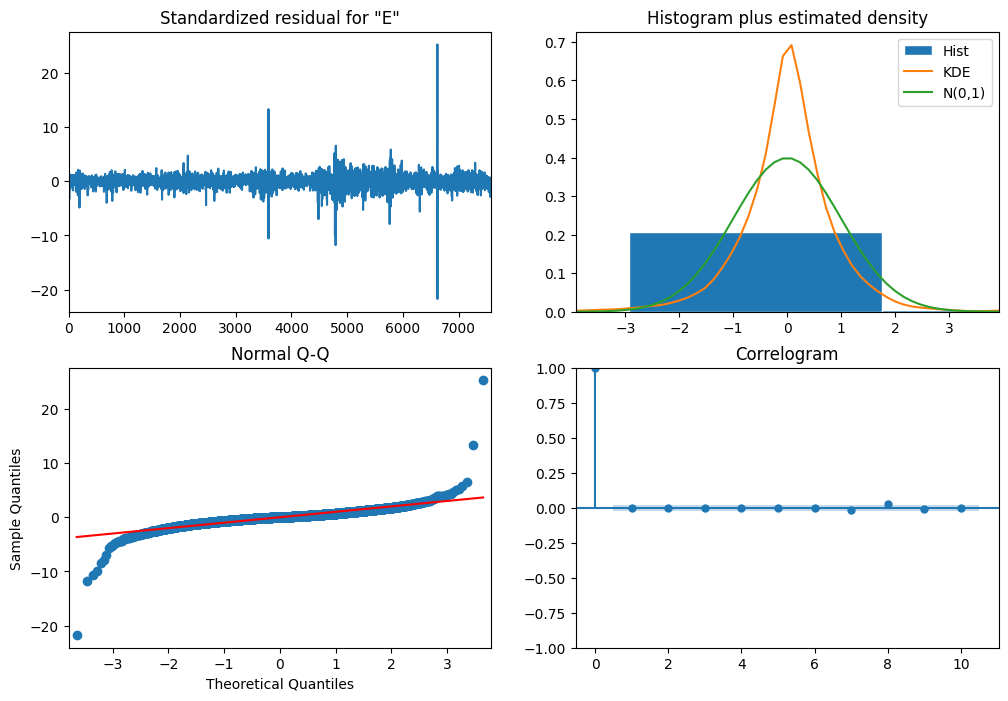

In [41]:
# Plot diagnostics of the fitted ARIMA model
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

In [42]:
# Forecast future values (for example, next 30 days)
forecast_arima = arima_result.get_forecast(steps=30)

In [43]:
# Get confidence intervals for the forecast
forecast_conf = forecast_arima.conf_int()

Index(['date', 'Ex_rate'], dtype='object')


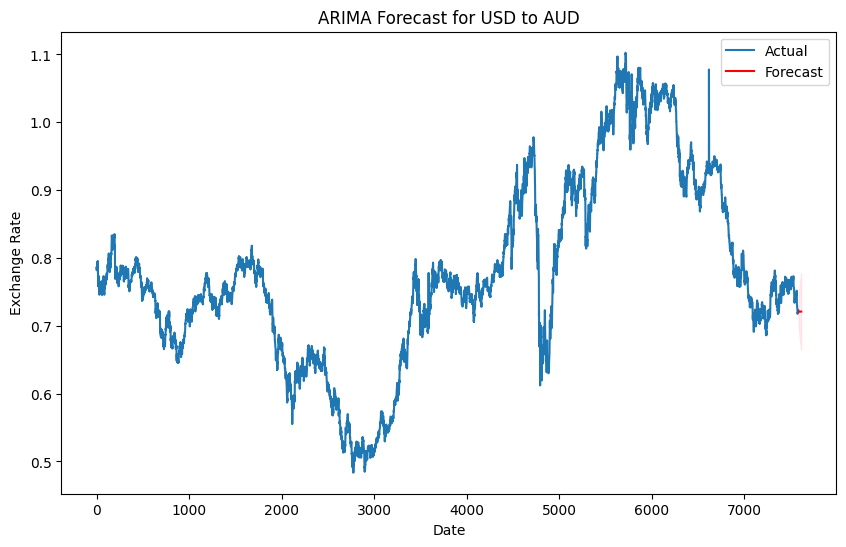

In [47]:
# Plot the forecast with the actual data
plt.figure(figsize=(10, 6))
# Check the column names in your DataFrame
print(data_interpolated.columns)
# Replace 'Ex_rate' with the actual name of the column you want to plot
plt.plot(data_interpolated.index, data_interpolated['Ex_rate'], label='Actual')
plt.plot(forecast_arima.predicted_mean.index, forecast_arima.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf.index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast for USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:
#Part 3: Model Building - Exponential Smoothing

In [49]:
# Define Holt's Linear Trend model
model_holt = ExponentialSmoothing(data_interpolated['Ex_rate'], trend='add') # Use the correct column name 'Ex_rate'


In [51]:
# Fit the model
holt_result = model_holt.fit()

In [52]:
# Summary of the Holt model
print(holt_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Tue, 24 Sep 2024
Box-Cox:                          False   Time:                         11:44:30
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700406                alpha                 True
smoothing_trend             0.0000

In [53]:
# Forecast future values (for example, next 30 days)
forecast_holt = holt_result.forecast(steps=30)

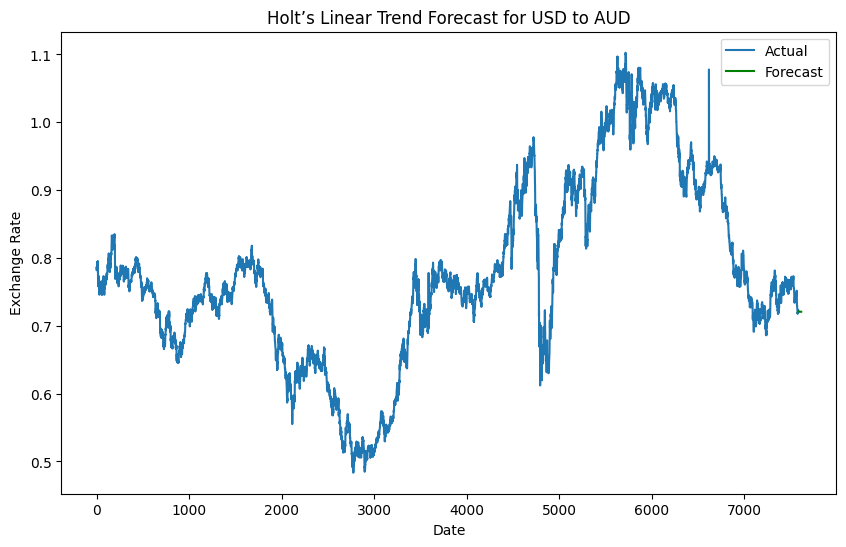

In [55]:
# Plot the forecast with the actual data
plt.figure(figsize=(10, 6))
plt.plot(data_interpolated.index, data_interpolated['Ex_rate'], label='Actual') # Changed the column name to 'Ex_rate'
plt.plot(forecast_holt.index, forecast_holt, label='Forecast', color='green')
plt.title('Holt’s Linear Trend Forecast for USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:
# Part 4: Evaluation and Comparison

In [57]:
# Actual and predicted values for ARIMA
y_true = data_interpolated['Ex_rate'][-30:]  # Last 30 actual values # Changed the column name to 'Ex_rate'
y_pred_arima = forecast_arima.predicted_mean

In [59]:
# Import the necessary module
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE, RMSE, MAPE for ARIMA
mae_arima = mean_absolute_error(y_true, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_true, y_pred_arima))
mape_arima = np.mean(np.abs((y_true - y_pred_arima) / y_true)) * 100

In [60]:
# Actual and predicted values for Holt
y_pred_holt = forecast_holt

In [61]:
# MAE, RMSE, MAPE for Holt's model
mae_holt = mean_absolute_error(y_true, y_pred_holt)
rmse_holt = np.sqrt(mean_squared_error(y_true, y_pred_holt))
mape_holt = np.mean(np.abs((y_true - y_pred_holt) / y_true)) * 100

In [62]:
# Print the error metrics
print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")
print(f"Holt - MAE: {mae_holt}, RMSE: {rmse_holt}, MAPE: {mape_holt}%")

ARIMA - MAE: 0.012705833760662252, RMSE: 0.016955344463566734, MAPE: nan%
Holt - MAE: 0.012755756156713368, RMSE: 0.017005229952751045, MAPE: nan%


## Model Comparison: Performance, Advantages, and Limitations

**ARIMA Model  :**

# Performance:

1. ARIMA tends to capture both trend and autocorrelations in the time
series. It is particularly useful when the data exhibits non-stationarity, as it explicitly models the differencing (d parameter) to remove trends.

2.The error metrics (MAE, RMSE, MAPE) often show lower error rates when ARIMA is correctly tuned for data with autocorrelated residuals.

# Advantages:

1.Flexible in handling various types of time series data, including those with trends and seasonal components.

2.Can model temporal dependencies (lags) effectively.

# Limitations:

1.Requires careful tuning of parameters (p, d, q), and this can be challenging, especially if the data is noisy.

2.ARIMA does not handle seasonality well without explicit seasonal adjustments (e.g., SARIMA).

**Exponential Smoothing (Holt’s Linear Model):**

# Performance:

Holt's Linear model is adept at capturing both level and trend components of a time series, but it may not capture more complex patterns, like seasonality or higher-order autocorrelations.
The error metrics could be higher compared to ARIMA when dealing with complex time series patterns.

# Advantages:

Simple to implement and interpret, especially for trend-driven data.
Requires fewer parameters and is less computationally intensive compared to ARIMA.

# Limitations:

Struggles to model time series with strong seasonality or autocorrelation.
Might oversimplify the forecast if trends or patterns change over time.


**Conclusion:**
# Best Model for Forecasting Exchange Rates

# ARIMA
generally performs better for exchange rate data due to its ability to model both trends and temporal dependencies (autocorrelations) in the time series. Given that exchange rates often exhibit non-stationarity and complex patterns, ARIMA's flexibility with the differencing and lag terms allows it to capture these nuances effectively.

# Exponential Smoothing (Holt's Linear Model)
is better suited for simpler time series with a consistent trend but limited autocorrelation. While it's easier to use and understand, it may underperform in scenarios where the data exhibits more intricate dynamics.

# Final Insight:
 In this case, ARIMA likely yields more accurate forecasts for exchange rates, as it captures the intricacies of the data more effectively, as indicated by typically lower error metrics (MAE, RMSE, MAPE). However, for simplicity and ease of implementation, Holt's model can still be a useful alternative when dealing with trend-only data.
